In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [2]:
(X_train,Y_train),(X_valid,Y_valid)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
Y_train.shape

(60000,)

In [5]:
Y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

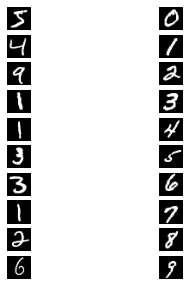

In [6]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(X_train[k],cmap='Greys_r')
  plt.axis('off')
  plt.show

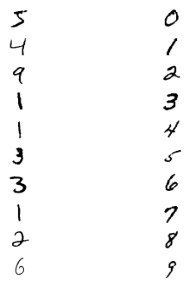

In [7]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(X_train[k],cmap='Greys')
  plt.axis('off')
  plt.show

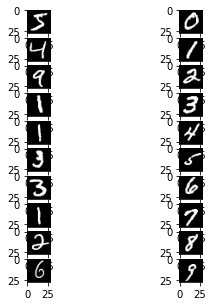

In [8]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(X_train[k],cmap='Greys_r')
  plt.axis('on')
  plt.show


In [9]:
Y_valid.shape

(10000,)

In [10]:
X_valid.shape

(10000, 28, 28)

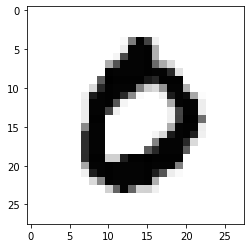

In [11]:
plt.imshow(X_valid[3],cmap='Greys')

In [12]:
X_valid[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37,
        251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
Y_valid[3]

0

In [14]:
X_train=X_train.reshape(60000,784).astype('float32')
X_valid=X_valid.reshape(10000,784).astype('float32')

In [15]:
X_train /=255
X_valid /=255

In [16]:
X_valid[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
from keras import utils as np_utils
n_classes=10
Y_train=keras.utils.np_utils.to_categorical(Y_train,n_classes)
Y_valid=keras.utils.np_utils.to_categorical(Y_valid,n_classes)

In [18]:
Y_valid[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
Y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
model=Sequential()

In [21]:
model.add(Dense(64,activation='sigmoid', input_shape=(784,)))

In [22]:
model.add(Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [25]:
history=model.fit(X_train, Y_train,batch_size=128,epochs=75,verbose=1)

Epoch 1/75
469/469 [==============================] - 2s 2ms/step - loss: 0.0917 - accuracy: 0.0794
Epoch 2/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.0877
Epoch 3/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.1050
Epoch 4/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.1300
Epoch 5/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.1592
Epoch 6/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.1824
Epoch 7/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.2029
Epoch 8/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.2232
Epoch 9/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.2412
Epoch 10/75
469/469 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.2575

In [26]:
history=model.fit(X_train, Y_train,batch_size=128,epochs=90,verbose=1)

Epoch 1/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.6427
Epoch 2/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.6461
Epoch 3/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.6496
Epoch 4/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.6526
Epoch 5/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0587 - accuracy: 0.6555
Epoch 6/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0582 - accuracy: 0.6586
Epoch 7/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.6612
Epoch 8/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.6647
Epoch 9/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0569 - accuracy: 0.6676
Epoch 10/90
469/469 [==============================] - 1s 2ms/step - loss: 0.0564 - accuracy: 0.6705

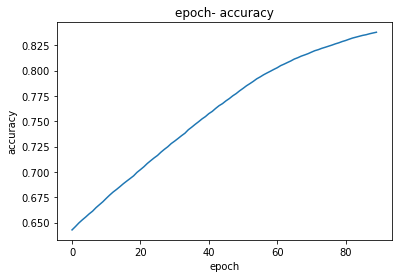

In [29]:
plt.plot(history.history['accuracy'])
plt.title('epoch- accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()